<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/7_2_CNN_MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 CNN 기반 인공신경망 학습하기


**MNIST 숫자 이미지 분류기 생성을 위한 작업 흐름도**

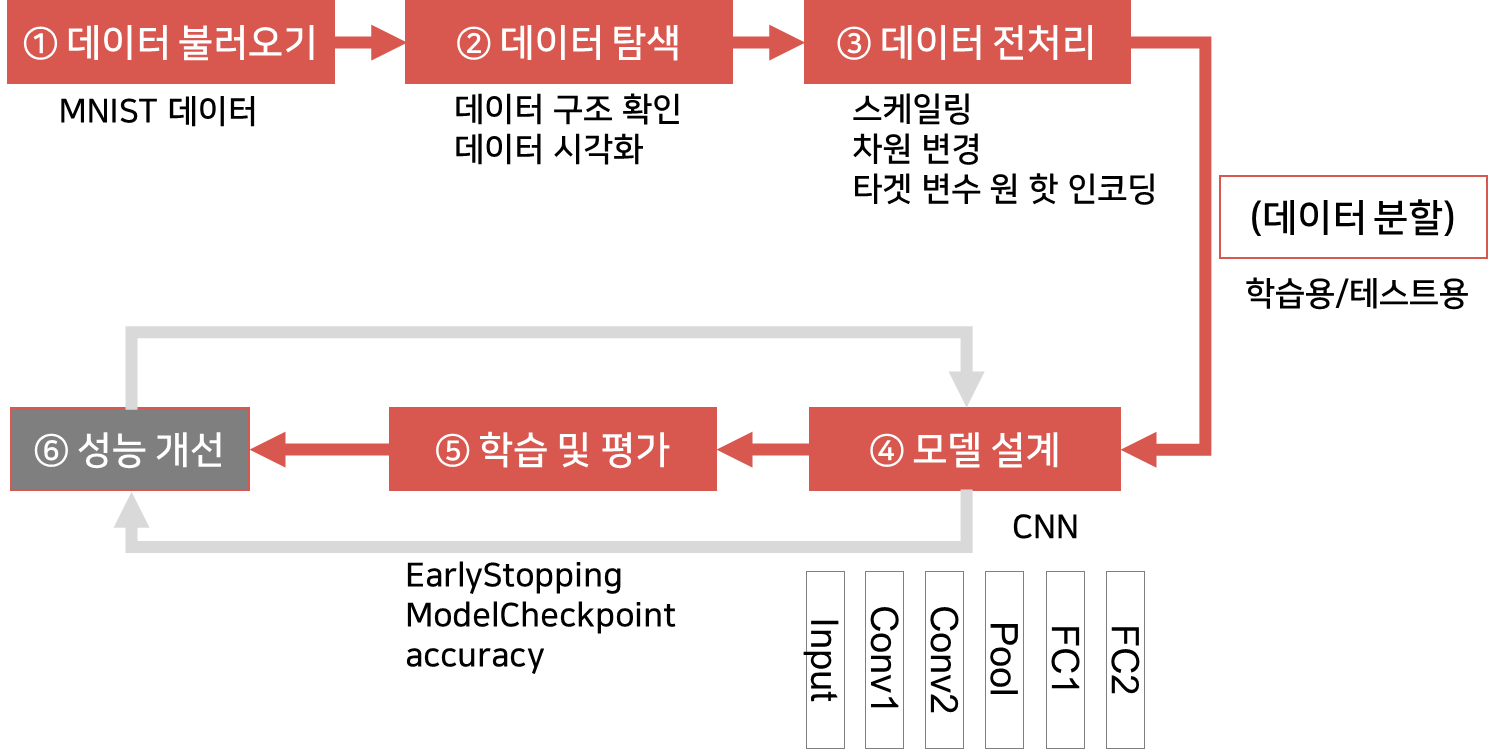


## 7.2.1 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import mnist

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 구조 확인
print("X_train:{}, Y_train:{}\nX_test:{}, Y_test:{}"\
      .format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
X_train:(60000, 28, 28), Y_train:(60000,)
X_test:(10000, 28, 28), Y_test:(10000,)


## 7.2.2 데이터 탐색

In [ ]:
X_train[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
Y_train[-1]

8

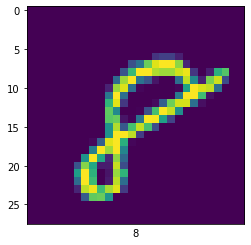

In [ ]:
import matplotlib.pyplot as plt

# 가장 마지막에 담겨있는 데이터를 이미지로 출력하기
plt.imshow(X_train[-1])
plt.xlabel(Y_train[-1])
plt.xticks([])
plt.show()

In [ ]:
for i in X_train[-1]:
    for j in i:
        print('{:4d}'.format(j), end="")
    print("\n")

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 237 248  40

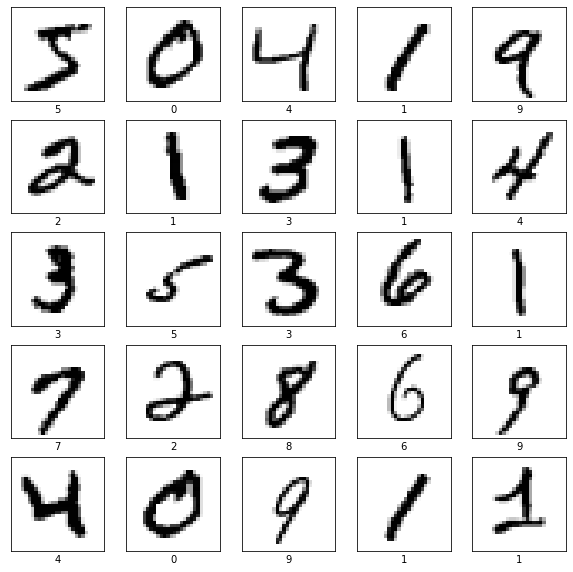

In [ ]:
# 상위 25개 데이터를 레이블과 함께 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    # 숫자 이미지 출력
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # 레이블 출력
    plt.xlabel(Y_train[i])
plt.show()

## 7.2.3 데이터 전처리

In [ ]:
# 스케일링
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# 차원 변경
X_train = X_train.reshape(X_train.shape[0],
                          X_train.shape[1],
                          X_train.shape[2],
                          1)
X_test = X_test.reshape(X_test.shape[0],
                        X_test.shape[1],
                        X_test.shape[2], 
                        1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
import numpy as np
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
# 원핫벡터 형태로 변환
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
Y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## 7.2.4 모델 설계

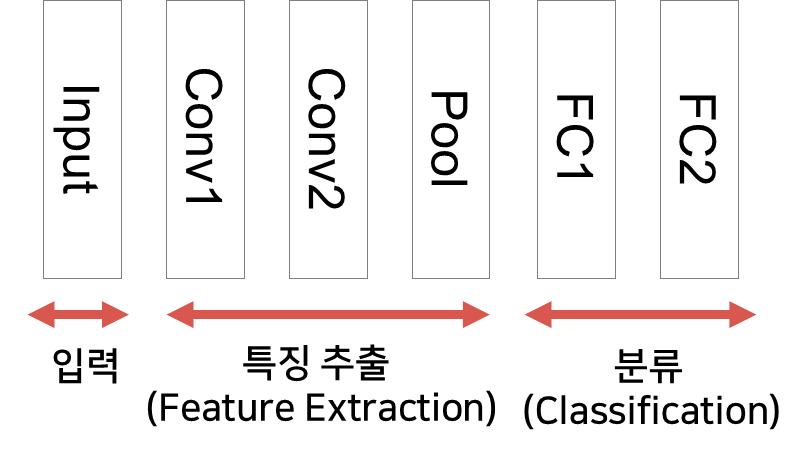

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# CNN 모델 설계
model = Sequential()
# Conv1
model.add(Conv2D(32, kernel_size=(3, 3), 
                 input_shape=(28, 28, 1), 
                 activation='relu',
                 name = 'Conv1'))
# Conv2
model.add(Conv2D(64, (3, 3), 
                 activation='relu',
                 name = 'Conv2'))
# Pool
model.add(MaxPooling2D(pool_size=2, name = 'Pool'))
model.add(Dropout(0.25))
model.add(Flatten())
# FC1
model.add(Dense(128,  activation='relu', name = 'FC1'))
model.add(Dropout(0.5))
# FC2
model.add(Dense(10, activation='softmax',name = 'FC2'))

# 모델 컴파일 – 손실함수, 옵티마이저, 평가 메트릭 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 26, 26, 32)        320       
                                                                 
 Conv2 (Conv2D)              (None, 24, 24, 64)        18496     
                                                                 
 Pool (MaxPooling2D)         (None, 12, 12, 64)        0         
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 FC1 (Dense)                 (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

## 7.2.5 학습 및 평가

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습 결과를 저장하기 위한 환경 설정정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.2f}.hdf5"

# 학습 중 모니터링 할 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)

# 학습의 이른 종료를 위한 조건 설정정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 학습
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
298/300 [============================>.] - ETA: 0s - loss: 0.2842 - accuracy: 0.9147
Epoch 1: val_loss improved from inf to 0.05856, saving model to ./model/01-0.06.hdf5
300/300 [==============================] - 13s 20ms/step - loss: 0.2827 - accuracy: 0.9151 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 2/30
298/300 [============================>.] - ETA: 0s - loss: 0.0925 - accuracy: 0.9728
Epoch 2: val_loss improved from 0.05856 to 0.04127, saving model to ./model/02-0.04.hdf5
300/300 [==============================] - 5s 15ms/step - loss: 0.0923 - accuracy: 0.9728 - val_loss: 0.0413 - val_accuracy: 0.9865
Epoch 3/30
298/300 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9797
Epoch 3: val_loss improved from 0.04127 to 0.03495, saving model to ./model/03-0.03.hdf5
300/300 [==============================] - 4s 13ms/step - loss: 0.0670 - accuracy: 0.9797 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 4/30
298/300 [============================>.] 

In [ ]:
history.history

{'loss': [0.2827402949333191,
  0.09233015030622482,
  0.0670238584280014,
  0.05531095713376999,
  0.04641777649521828,
  0.04111941158771515,
  0.039039984345436096,
  0.0315900482237339,
  0.02903599850833416,
  0.027675002813339233,
  0.026061179116368294,
  0.02272096835076809,
  0.021171197295188904,
  0.02110244892537594,
  0.020016919821500778,
  0.019293848425149918,
  0.016283968463540077,
  0.015837296843528748,
  0.01596663147211075,
  0.014398840256035328,
  0.012932715937495232,
  0.014628170989453793,
  0.013715138658881187,
  0.013357097283005714],
 'accuracy': [0.9150833487510681,
  0.9728333353996277,
  0.9796833395957947,
  0.9831166863441467,
  0.9858499765396118,
  0.9874833226203918,
  0.9875333309173584,
  0.9897000193595886,
  0.9902666807174683,
  0.9910833239555359,
  0.9916499853134155,
  0.9924499988555908,
  0.9931166768074036,
  0.9929666519165039,
  0.9931833148002625,
  0.9936333298683167,
  0.9945666790008545,
  0.9946333169937134,
  0.9945999979972839,

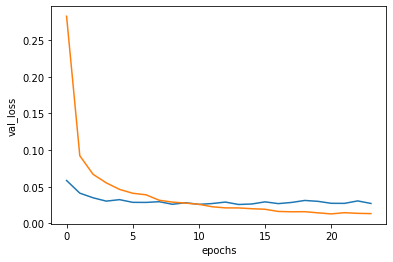

In [ ]:
import pandas as pd
import seaborn as sns

accuracy =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

# 데이터 프레임 생성
df = pd.DataFrame({'epochs' : range(len(accuracy)), 
                   'accuracy': accuracy, 'loss': loss, 
                   'val_accuracy': val_accuracy, 'val_loss': val_loss})

# epochs에 따른 loss값의 변화 시각화
sns.lineplot(x= df['epochs'], y = df['val_loss'])
sns.lineplot(x= df['epochs'], y = df['loss'])